In [1]:
# Copyright (C) 2022 Insitro, Inc. This software and any derivative works are licensed under the 
# terms of the Creative Commons Attribution-NonCommercial 4.0 International Public License (CC-BY-NC 4.0), 
# accessible at https://creativecommons.org/licenses/by-nc/4.0/legalcode

In [1]:
import pytorch_lightning as pl
from tqdm.autonotebook import tqdm
import numpy as np

In [2]:
from datamodules import DataModule
from pyro_models import PyroModel

In [3]:
datamodule = DataModule(batch_size=64,
                             test_batch_size=64, 
                             poses=20, 
                             splits_fname='splits_jacs_full.npz',
                             dataset_csv_fname='JACS_full.csv',
                             df_eval_fname='df_eval_data.csv',
                             source_eval='caix',
                             cnn_feats_train_fname='cnn_feats_JACS_full.pt',
                             cnn_feats_eval_fname='cnn_feats_hca_ChEMBL.pt',
                             source_data='jacs_counts',)

Number of datapoints: 108528; using JACS dataset with counts
Getting CNN feats from : ../notebooks/cnn_feats_JACS_full.pt)


Calculating Getting graph data fingerprints:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph poses:   0%|          | 0/20 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

Getting graph data:   0%|          | 0/108528 [00:00<?, ?it/s]

train/val/test split: 0.7/0.1/0.2
Using eval data: 3324 samples
Getting CNN feats from : ../notebooks/cnn_feats_hca_ChEMBL.pt)


Calculating Getting eval graph data fingerprints:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting graph poses:   0%|          | 0/20 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Getting eval graph data:   0%|          | 0/3324 [00:00<?, ?it/s]

Using splits from: splits_jacs_full.npz


In [4]:
import torch
from collections import OrderedDict

In [9]:
model = PyroModel.load_from_checkpoint('ckpt.ckpt')

In [10]:
trainer = pl.Trainer(gpus=1)

/home/ec2-user/miniconda3/envs/pyg_pyro/lib/python3.7/site-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  category=PossibleUserWarning,
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [11]:
trainer.validate(model, datamodule)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/ec2-user/miniconda3/envs/pyg_pyro/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/home/ec2-user/miniconda3/envs/pyg_pyro/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, val_dataloader 1, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Validation: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Validate metric                 DataLoader 0                   DataLoader 1
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    VAL_EMA_eval_ki_pearson         -0.04222378698927178           -0.04222378698927178
   VAL_EMA_eval_ki_spearman         -0.33496421549456784           -0.33496421549456784
val_EMA_eval_ki_pearson_subset      -0.11996671076972967           -0.11996671076972967
val_EMA_eval_ki_spearman_subset     -0.19539824144675647           -0.19539824144675647
         val_EMA_loss                 1.410651445388794
           val_loss                   1.410620093345642
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val_EMA_loss/dataloader_idx_0': 1.410651445388794,
  'val_loss/dataloader_idx_0': 1.410620093345642,
  'VAL_EMA_eval_ki_pearson': -0.04222378698927178,
  'VAL_EMA_eval_ki_spearman': -0.33496421549456784,
  'val_EMA_eval_ki_pearson_subset': -0.11996671076972967,
  'val_EMA_eval_ki_spearman_subset': -0.19539824144675647},
 {'VAL_EMA_eval_ki_pearson': -0.04222378698927178,
  'VAL_EMA_eval_ki_spearman': -0.33496421549456784,
  'val_EMA_eval_ki_pearson_subset': -0.11996671076972967,
  'val_EMA_eval_ki_spearman_subset': -0.19539824144675647}]

In [12]:
trainer.test(model, datamodule)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/ec2-user/miniconda3/envs/pyg_pyro/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/home/ec2-user/miniconda3/envs/pyg_pyro/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, test_dataloader 1, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0             DataLoader 1
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
test_EMA_eval_ki_pearson   -0.04222378698927178     -0.04222378698927178
test_EMA_eval_ki_spearman  -0.33496421549456784     -0.33496421549456784
      test_EMA_loss         1.4094619750976562
        test_loss           1.4094315767288208
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss/dataloader_idx_0': 1.4094315767288208,
  'test_EMA_loss/dataloader_idx_0': 1.4094619750976562,
  'test_EMA_eval_ki_pearson': -0.04222378698927178,
  'test_EMA_eval_ki_spearman': -0.33496421549456784},
 {'test_EMA_eval_ki_pearson': -0.04222378698927178,
  'test_EMA_eval_ki_spearman': -0.33496421549456784}]

In [13]:
model.eval()

PyroPyroModel(
  (cnn_embed): PyroSequential(
    (0): PyroLinear(in_features=224, out_features=256, bias=True)
    (1): PyroLeakyReLU(negative_slope=0.01)
    (2): PyroResidualNLayerMLP(
      (main_modules): PyroModuleList(
        (0): PyroSequential(
          (0): PyroLinear(in_features=256, out_features=128, bias=True)
          (1): PyroLeakyReLU(negative_slope=0.01)
          (2): PyroDropout(p=0.5, inplace=False)
          (3): PyroLinear(in_features=128, out_features=256, bias=True)
          (4): PyroLeakyReLU(negative_slope=0.01)
          (5): PyroDropout(p=0.5, inplace=False)
        )
        (1): PyroSequential(
          (0): PyroLinear(in_features=256, out_features=128, bias=True)
          (1): PyroLeakyReLU(negative_slope=0.01)
          (2): PyroDropout(p=0.5, inplace=False)
          (3): PyroLinear(in_features=128, out_features=256, bias=True)
          (4): PyroLeakyReLU(negative_slope=0.01)
          (5): PyroDropout(p=0.5, inplace=False)
        )
      )
    

In [14]:
enrichments = list()
attn_scores = list()
with torch.inference_mode():
    for batch in tqdm(datamodule.test_dataloader()[1]):
        with model.ema.average_parameters():
            R, attn = model.forward(batch, return_attn_scores=True)
        enrichments.append(R.cpu().numpy())
        attn_scores.append(attn[..., 0].cpu().numpy())
attn_scores = np.concatenate(attn_scores)
enrichments = np.concatenate(enrichments)

  0%|          | 0/52 [00:00<?, ?it/s]

In [15]:
from rdkit import Chem

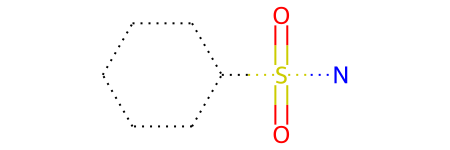

In [16]:
#Chem.MolFromSmiles('S(=O)(=O)N')
patt = Chem.MolFromSmarts("c1ccccc1S(=O)(=O)[NH2]")
patt

In [17]:
df_eval = datamodule.df_eval

In [18]:
ki_valid = ~datamodule.df_eval['Ki (nM)'].isnull()

In [19]:
ms_eval = [Chem.MolFromSmiles(smi) for smi in df_eval['smiles']]

In [20]:
sulf_containing = np.array([m.HasSubstructMatch(patt) for m in ms_eval])
sulf_containing_idxs = np.where(sulf_containing)[0]
not_sulf_containing_idxs = np.where(~sulf_containing)[0]

In [21]:
sulf_mask = np.logical_and(ki_valid.values, sulf_containing)
no_sulf_mask = np.logical_and(ki_valid.values, ~sulf_containing)

In [22]:
ki = df_eval['Ki (nM)'][ki_valid].values

In [23]:
import pandas as pd
import seaborn as sns

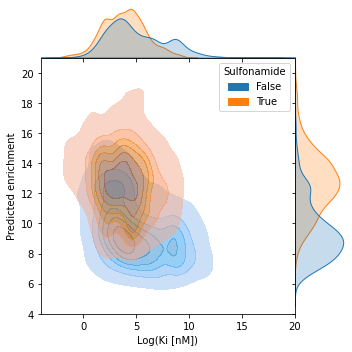

In [24]:
d ={'Log(Ki [nM])':np.log(ki), 'Predicted enrichment':enrichments[ki_valid], 'Sulfonamide':sulf_mask[ki_valid]}
df = pd.DataFrame(d)
sns.jointplot(data=df, kind='kde', x='Log(Ki [nM])',y='Predicted enrichment', hue='Sulfonamide', height=5, space=0, levels=7,fill=True, alpha=0.5, ylim=(4, 21), xlim=(-4, 20))